In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
startup = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/50_Startups.csv?raw=True')

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

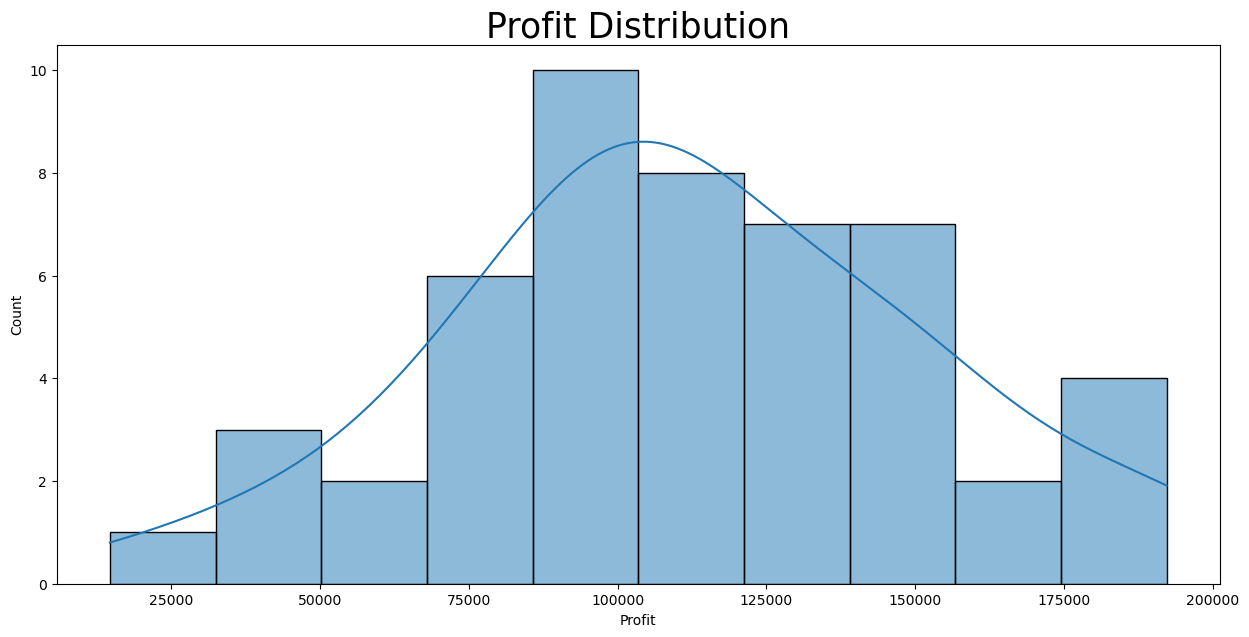

In [6]:
plt.figure(figsize=(15,7))
sns.histplot(data=startup,x='Profit',kde=True,bins=10)
plt.title('Profit Distribution',size=25)#to check data is balanced or imbalanced
plt.show()

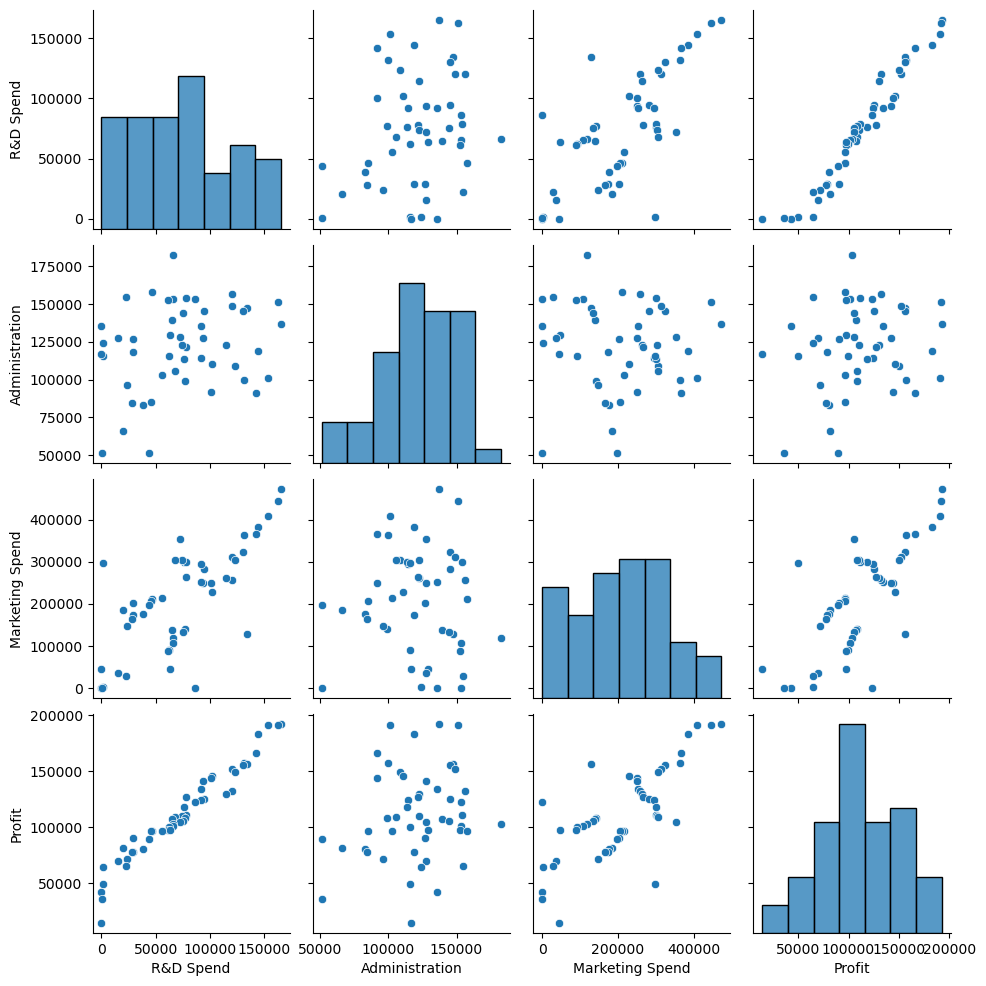

In [7]:
sns.pairplot(startup)

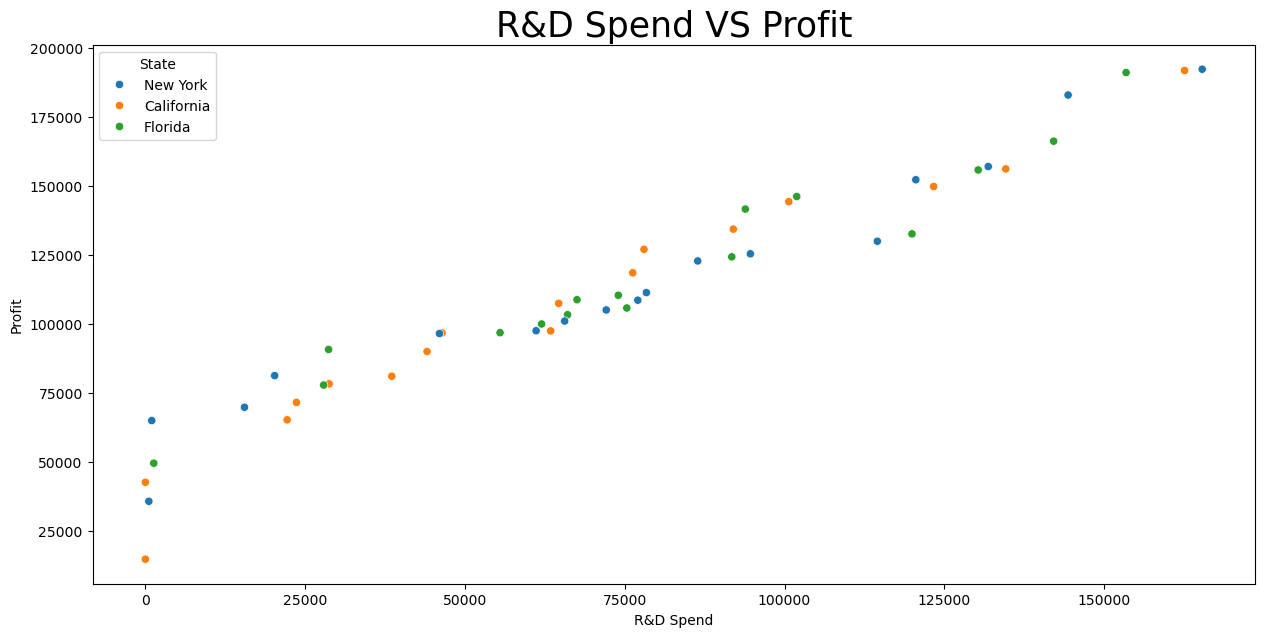

In [8]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=startup,x='R&D Spend',y='Profit',hue='State')
plt.title('R&D Spend VS Profit',size=25)
plt.show()

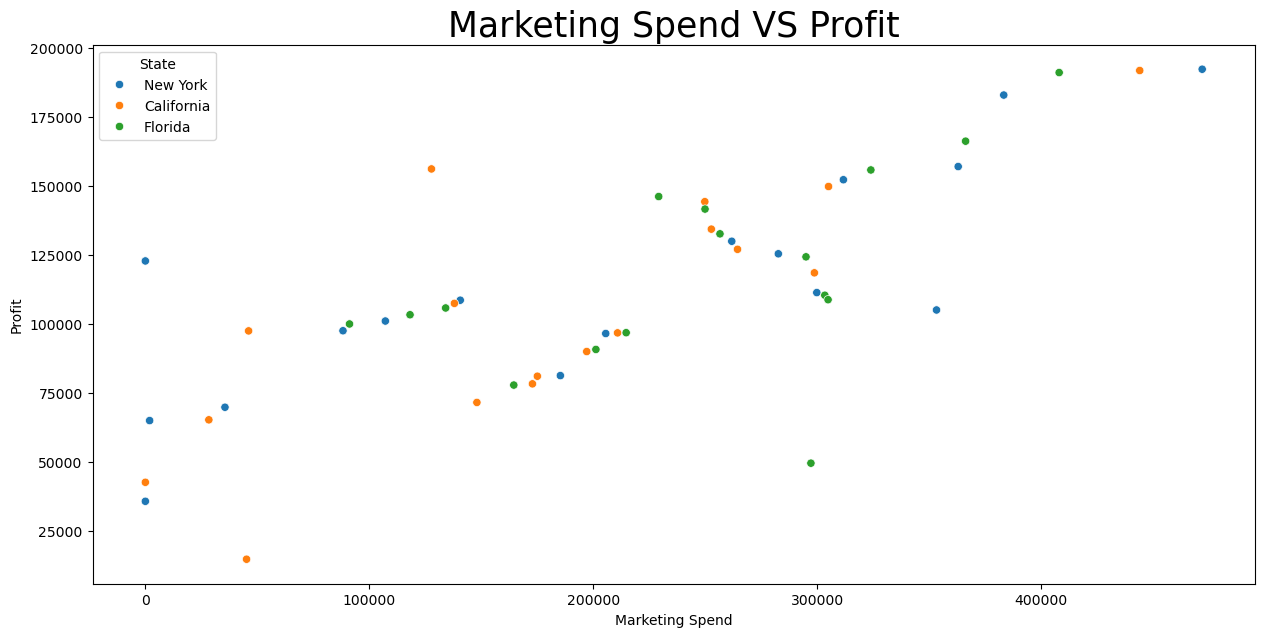

In [9]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=startup,x='Marketing Spend',y='Profit',hue='State')
plt.title('Marketing Spend VS Profit',size=25)
plt.show()

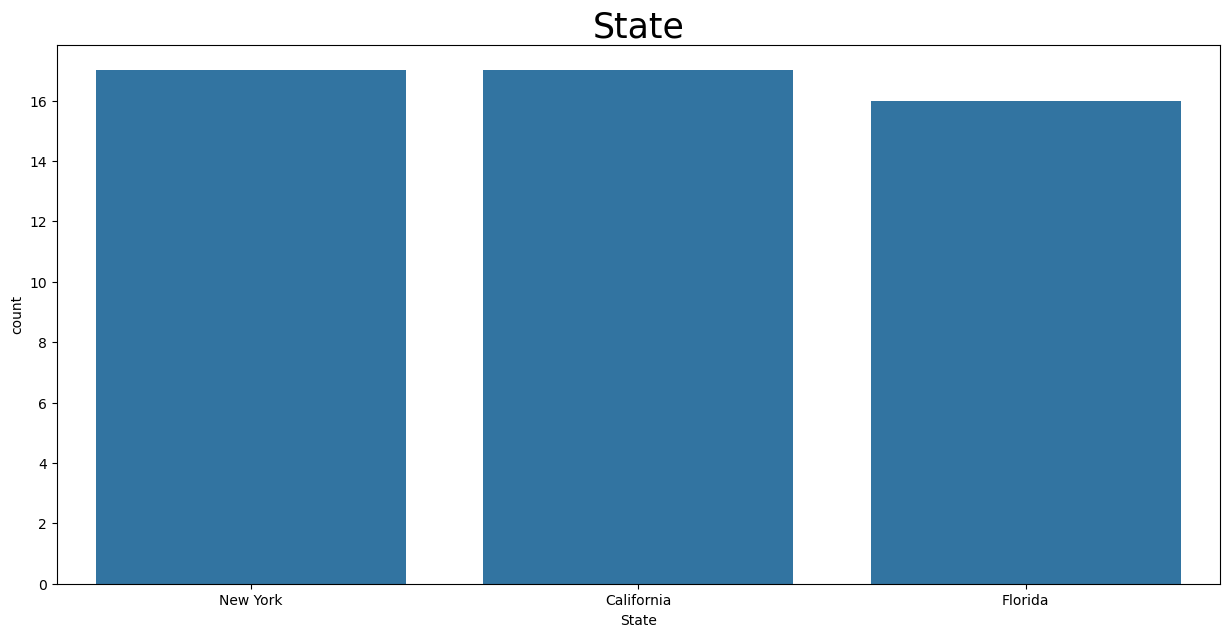

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(data=startup,x='State')
plt.title('State',size=25)
plt.show()

In [11]:
startup_corr= startup.corr(numeric_only=True)

In [12]:
startup_corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [13]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


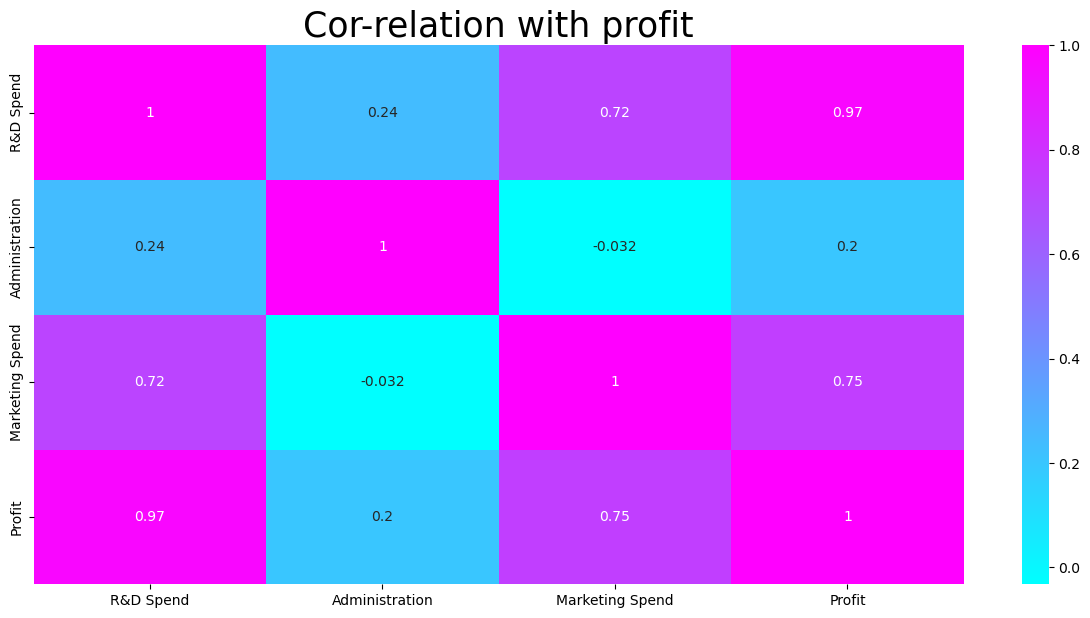

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(data=startup_corr,annot=True,cmap='cool')
plt.title('Cor-relation with profit',size=25)
plt.show()

In [15]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
X = startup.drop(['State','Profit'],axis=1)
Y = startup['Profit']

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [18]:
X_test

,R&D Spend,Administration,Marketing Spend
37,44069.95,51283.14,197029.42
14,119943.24,156547.42,256512.92
21,78389.47,153773.43,299737.29
32,63408.86,129219.61,46085.25
22,73994.56,122782.75,303319.26
1,162597.70,151377.59,443898.53
26,75328.87,144135.98,134050.07
46,1315.46,115816.21,297114.46
42,23640.93,96189.63,148001.11
47,0.00,135426.92,0.00


In [19]:
# y = b1x1 + b2x2 + b3x3 +b0

In [20]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [21]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [22]:
b = linear_model.coef_
b

array([0.7799469 , 0.0174003 , 0.03602112])

In [23]:
c = linear_model.intercept_
c

45925.627096637196

In [24]:
X_test.iloc[0]

R&D Spend           44069.95
Administration      51283.14
Marketing Spend    197029.42
Name: 37, dtype: float64

In [25]:
Y_test[37] #actual profit

89949.14

In [26]:
y = b[0]*44069.95 + b[1]*51283.14 + b[2]*197029.42 + c
y

88287.4106264624

In [27]:
linear_model.predict([[44069,51283,197029]])

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88286.652112])

In [28]:
predictions = linear_model.predict(X_test)

In [29]:
predictions

array([ 88287.41062646, 151438.84017595, 120537.82823503,  99289.67306481,
       116699.81127514, 191366.93722057, 112014.78869329,  59669.24898719,
        71369.19151394,  48282.09608943])

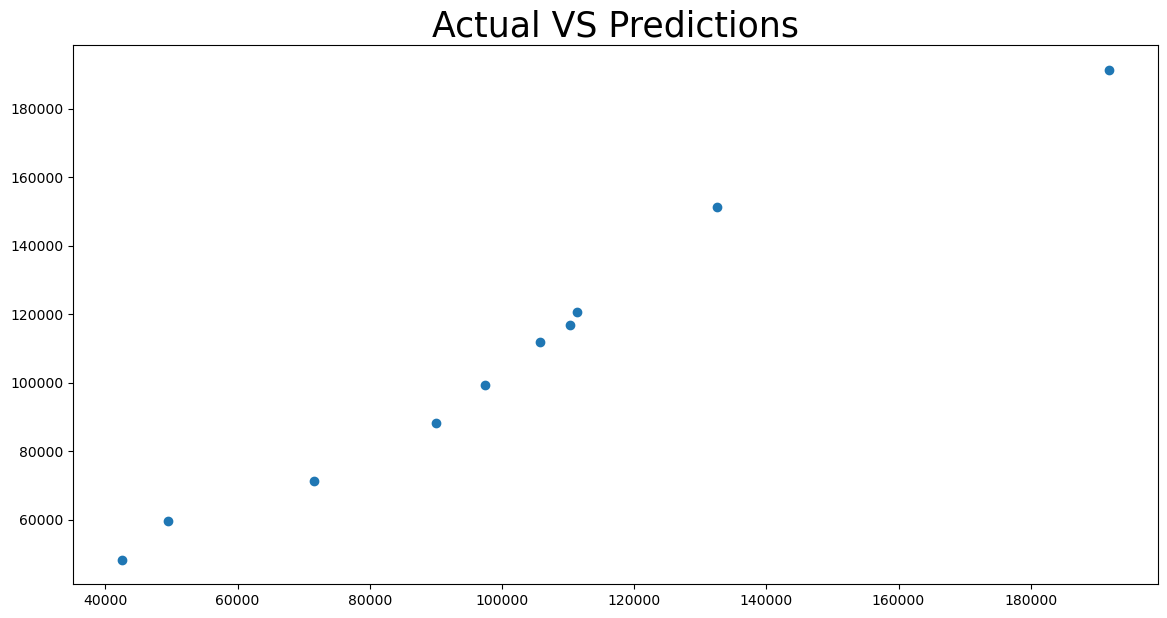

In [30]:
plt.figure(figsize=(14,7))
plt.scatter(Y_test,predictions)
plt.title('Actual VS Predictions',size=25)
plt.show()

In [31]:
Housing = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/USA_Housing.csv?raw=True')
Housing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [32]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [33]:
Housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

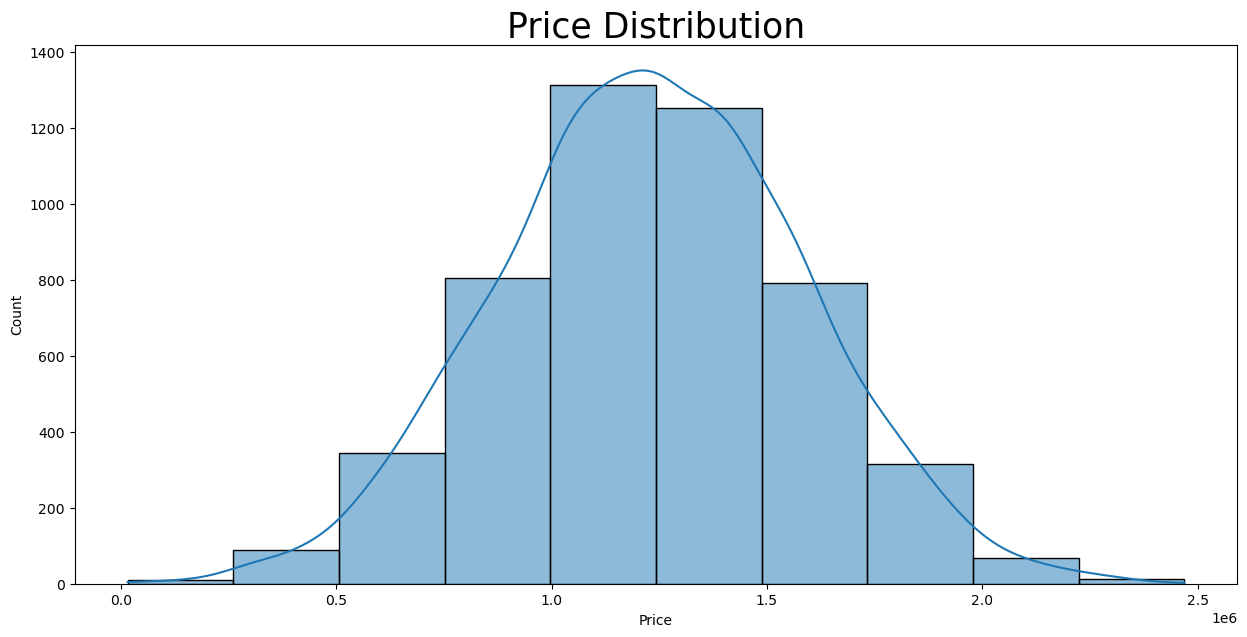

In [34]:
plt.figure(figsize=(15,7))
sns.histplot(data=Housing,x='Price',kde=True,bins=10)
plt.title('Price Distribution',size=25)#to check data is balanced or imbalanced
plt.show()

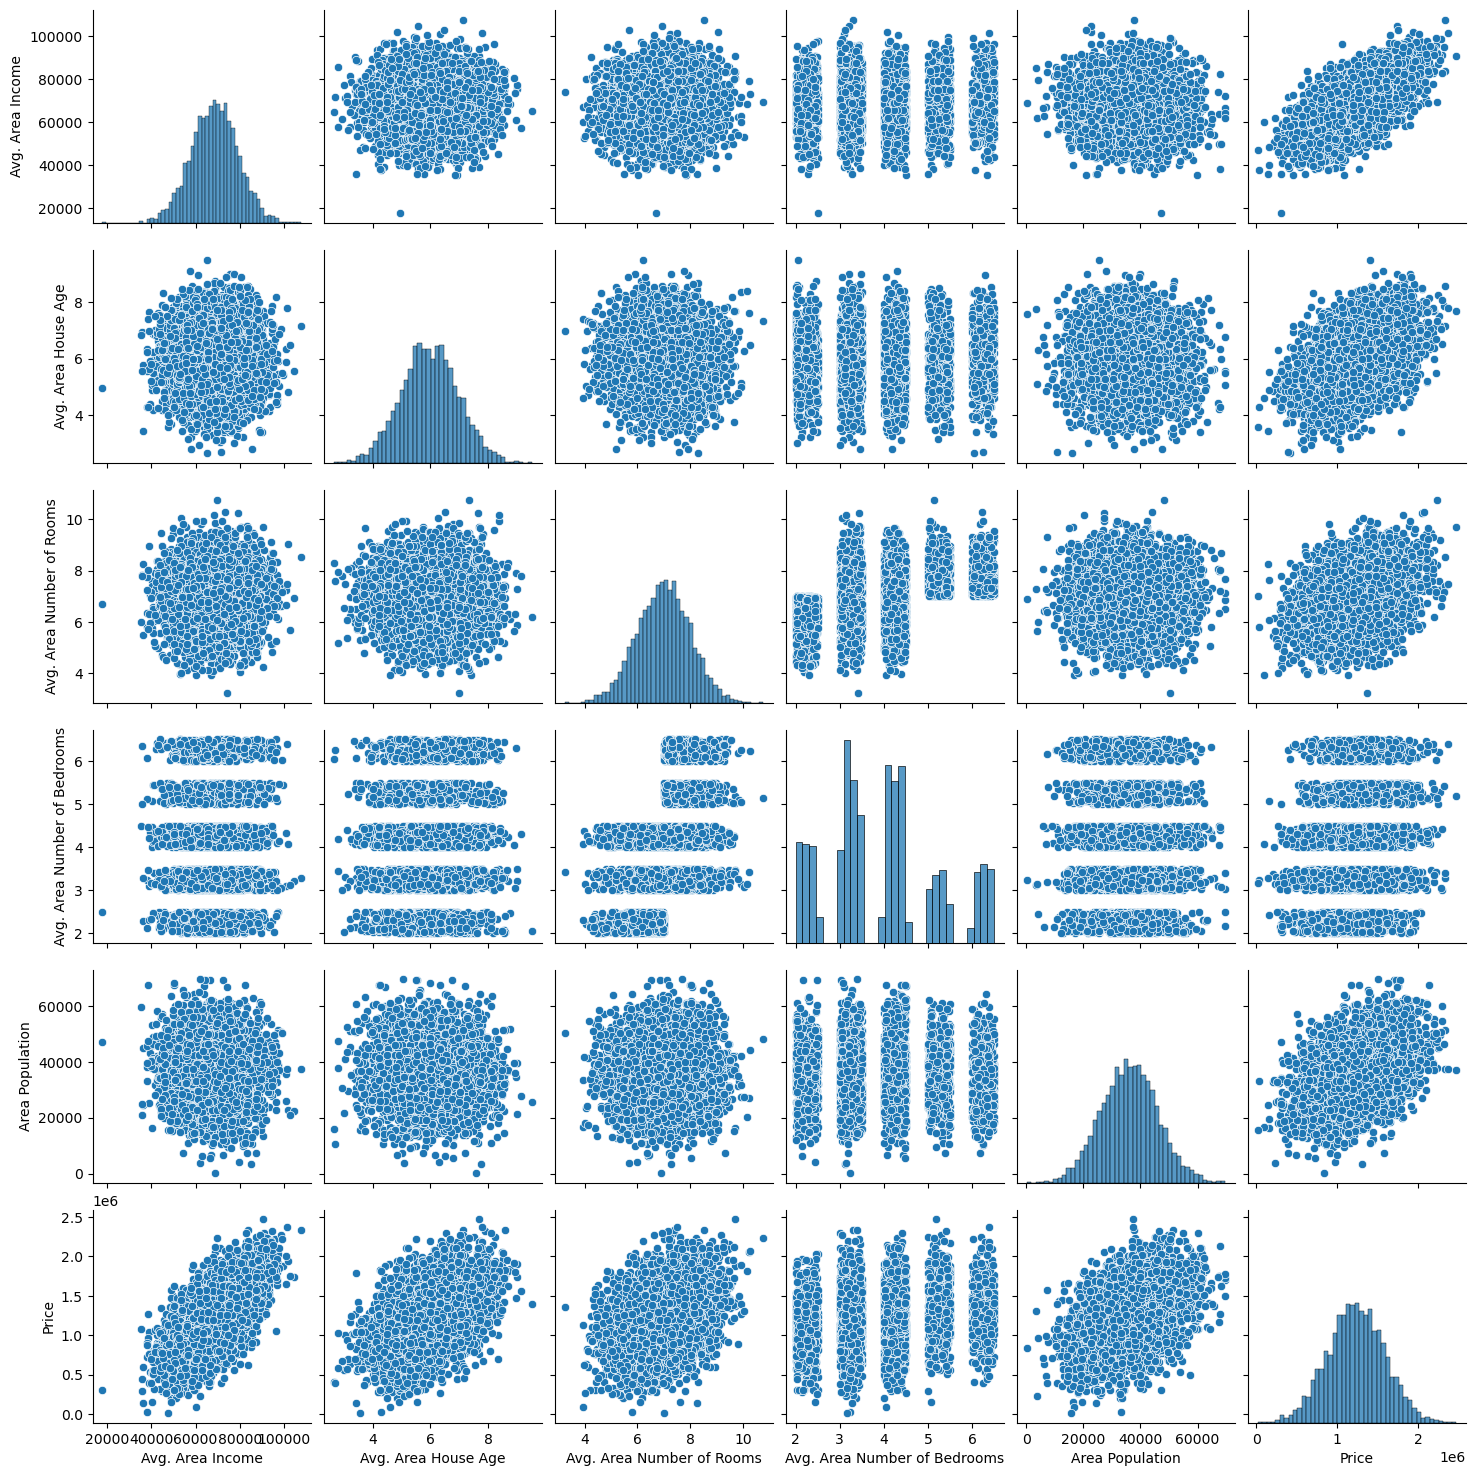

In [35]:
sns.pairplot(Housing)

In [36]:
Housing_corr= Housing.corr(numeric_only=True)
Housing_corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


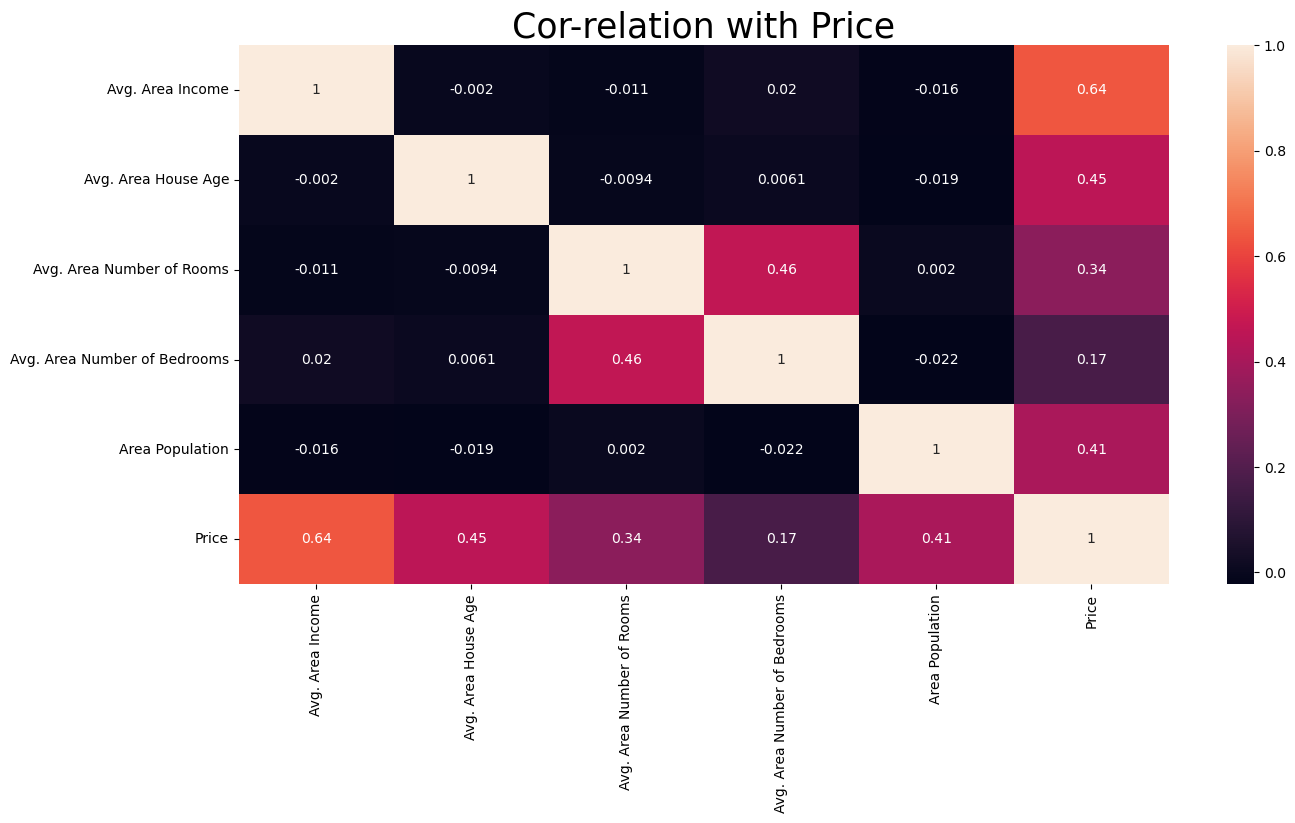

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(data=Housing_corr,annot=True)
plt.title('Cor-relation with Price',size=25)
plt.show()

In [38]:
x = Housing.drop(['Address','Price'],axis=1)
y = Housing['Price']

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [40]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,7.427689,6.22,26008.309124
345,73643.057298,6.766853,8.337085,3.34,43152.139577
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
54,72942.705059,4.786222,7.319886,6.41,24377.909049
...,...,...,...,...,...
3900,77615.851343,6.200603,6.909327,2.27,36591.523448
3753,66925.199349,5.153050,8.396903,3.16,42590.685170
3582,71778.026176,5.921280,7.411045,4.00,37634.041316
2392,87272.093393,5.025866,7.184765,5.39,7522.333138


In [41]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [42]:
x_test.iloc[0]

Avg. Area Income                66774.995817
Avg. Area House Age                 5.717143
Avg. Area Number of Rooms           7.795215
Avg. Area Number of Bedrooms        4.320000
Area Population                 36788.980327
Name: 1718, dtype: float64

In [43]:
y_test[1718]

1251688.6157028745

In [44]:
linear_model.predict([[66774.995817,5.717143,7.795215,4.320000,36788.980327]])

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1257919.71744578])

In [45]:
predictions1 = linear_model.predict(x_test)
predictions1

array([1257919.729097  ,  822112.41884197, 1740669.05865495,
        972452.12917494,  993422.26329315,  644126.07414456,
       1073911.79101682,  856584.00194133, 1445318.25518365,
       1204342.19071174, 1455792.46212863, 1298556.65696433,
       1735924.33836095, 1336925.77577789, 1387637.43231922,
       1222403.77772069,  613786.28691982,  963933.54416267,
       1221197.33050139, 1198071.57563599,  505861.89531673,
       1769106.54723353, 1853881.16842511, 1200369.50507868,
       1065129.1285072 , 1812033.73067313, 1768686.47091262,
       1439920.83814323, 1387251.99649376, 1541178.39224181,
        726418.80504278, 1754497.60908688, 1462185.72653198,
       1025600.16081145, 1284926.8685155 ,  917454.59590853,
       1187046.94956865,  999330.91117487, 1329536.63409595,
        782191.60441437, 1393272.03053841,  578216.88394851,
        822643.37151048, 1895533.11413226, 1672019.84892041,
        966926.45434583, 1129674.55638146,  792797.75914663,
       1161057.18412143,

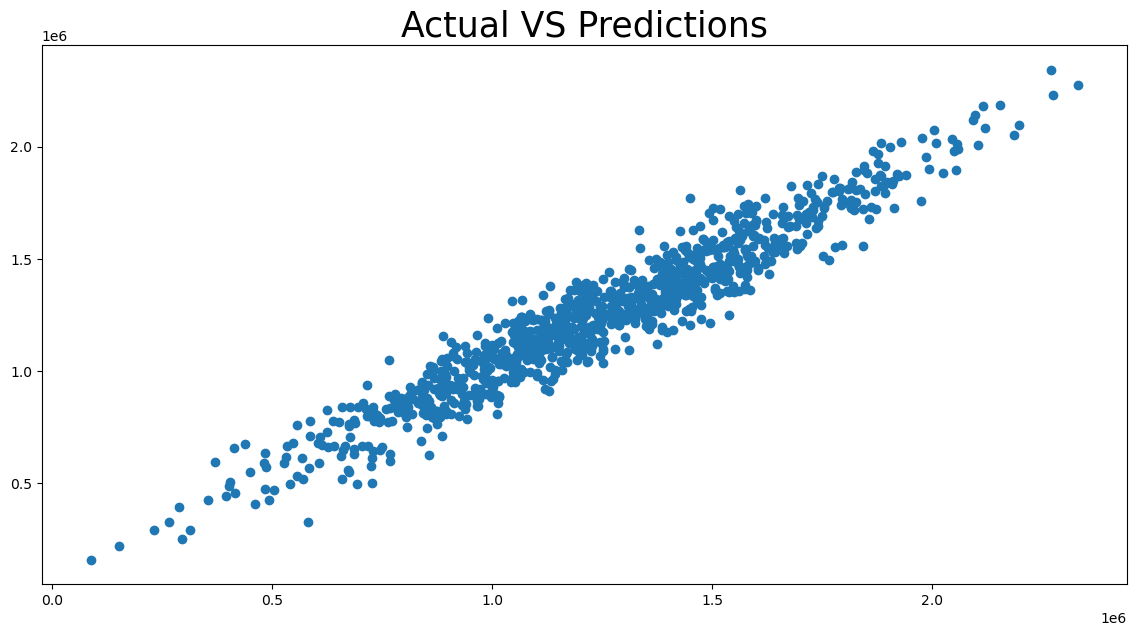

In [46]:
plt.figure(figsize=(14,7))
plt.scatter(y_test,predictions1)
plt.title('Actual VS Predictions',size=25)
plt.show()